## <B> Project : Lung Cancer Prediction </B>
Objective : Is to analyze the data given to predict the possiblility of a patient to diagnose with lung cancer.<br>
Task 1 : Exploratory Data Analysis


--> Below are my initial import items for this project

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
import os
import warnings
warnings.filterwarnings("ignore")
import sqlite3
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

--> Connecting to my database - lung_cancer.db given.

In [3]:
con = sqlite3.connect("C:/Users/Tittu/Downloads/lung_cancer.db")
df = pd.read_sql_query("SELECT * from lung_cancer", con)

--> As part of data analysing, cleansing and filtering, I am removing all negative age groups. <br>
--> Assumptions: <br>
--> 1. Around 229 negative age groups are in the table which I presume some incorrect info to remove so as to do our prediction closer to 100% accuracy. <br>
--> 2. Not removing them will unnecessarily give a confusion in terms of averaging and aggregation. <br>
--> 3. Below 10119 data/row out of 10398 is reduction of negative age rows of 229.

In [4]:
df.head()

,ID,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0


In [5]:
new_columns = ["id", "age", "gender", "copdhis", "genmarkers", "airpolexp", "lastw", "curw", "strsmoke", "stosmoke", "takbroncho", "freqtired", "domhand", "lcancerocc"]

In [7]:
df.columns = new_columns

In [8]:
df.head()

,id,age,gender,copdhis,genmarkers,airpolexp,lastw,curw,strsmoke,stosmoke,takbroncho,freqtired,domhand,lcancerocc
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0


In [346]:
df = df[df['age'] >= 0]
print(df)

                 id  age  gender copdhis   genmarkers airpolexp  lastw  curw  \
0      1.468154e+16   42    Male      No  Not Present    Medium     73    69   
1      1.271684e+18   72    Male     Yes  Not Present      High     50    42   
2      1.708068e+18   65    Male     Yes  Not Present       Low     65    75   
3      3.555829e+17   67    Male      No  Not Present      High     69    58   
4      1.684598e+18   54    Male     Yes  Not Present    Medium     46    40   
...             ...  ...     ...     ...          ...       ...    ...   ...   
10343  6.202150e+17   47    Male     Yes      Present       Low     55    50   
10344  1.157407e+18   59  Female     Yes  Not Present       Low     80    81   
10345  1.488014e+18   34    Male      No  Not Present      High     65    57   
10346  3.987035e+17   69    Male      No  Not Present      High     81    75   
10347  1.297767e+18   60    MALE    None  Not Present    Medium     82    75   

      strsmoke       stosmoke takbronch

--> Below provides info on Nan, Non-null and data type info. <br>
--> Please notice that there is decrease in non-null data for COPD history, Air Pollustion exposure & Taken Bronchodilators.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10348 non-null  float64
 1   age         10348 non-null  int64  
 2   gender      10348 non-null  object 
 3   copdhis     9236 non-null   object 
 4   genmarkers  10348 non-null  object 
 5   airpolexp   10345 non-null  object 
 6   lastw       10348 non-null  int64  
 7   curw        10348 non-null  int64  
 8   strsmoke    10348 non-null  object 
 9   stosmoke    10348 non-null  object 
 10  takbroncho  9287 non-null   object 
 11  freqtired   10348 non-null  object 
 12  domhand     10348 non-null  object 
 13  lcancerocc  10348 non-null  int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 1.1+ MB


--> Below provides high level info on your data types.

In [10]:
df.dtypes

id            float64
age             int64
gender         object
copdhis        object
genmarkers     object
airpolexp      object
lastw           int64
curw            int64
strsmoke       object
stosmoke       object
takbroncho     object
freqtired      object
domhand        object
lcancerocc      int64
dtype: object

--> Below helps to show how many null data points in the database for each column. <br>
--> Here, please check there are about 1083 and 1037 null records under COPD History and Taken Bronchodilators columns respectively.

In [11]:
df.isna().sum()

id               0
age              0
gender           0
copdhis       1112
genmarkers       0
airpolexp        3
lastw            0
curw             0
strsmoke         0
stosmoke         0
takbroncho    1061
freqtired        0
domhand          0
lcancerocc       0
dtype: int64

In [12]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total missing value"])

,Total missing value
id,0
age,0
gender,0
copdhis,1112
genmarkers,0
airpolexp,3
lastw,0
curw,0
strsmoke,0
stosmoke,0


In [13]:
# con = sqlite3.connect("C:/Users/Tittu/Downloads/lung_cancer.db")
# df = pd.read_sql_query("SELECT * from lung_cancer", con)
df.dropna(subset=['copdhis', 'takbroncho' ], inplace=True)

print(df)

                 id  age  gender copdhis   genmarkers airpolexp  lastw  curw  \
0      1.468154e+16   42    Male      No  Not Present    Medium     73    69   
1      1.271684e+18   72    Male     Yes  Not Present      High     50    42   
2      1.708068e+18   65    Male     Yes  Not Present       Low     65    75   
3      3.555829e+17   67    Male      No  Not Present      High     69    58   
4      1.684598e+18   54    Male     Yes  Not Present    Medium     46    40   
...             ...  ...     ...     ...          ...       ...    ...   ...   
10342  7.785505e+17   71    Male     Yes  Not Present      High    100    93   
10343  6.202150e+17   47    Male     Yes      Present       Low     55    50   
10344  1.157407e+18   59  Female     Yes  Not Present       Low     80    81   
10345  1.488014e+18   34    Male      No  Not Present      High     65    57   
10346  3.987035e+17   69    Male      No  Not Present      High     81    75   

      strsmoke       stosmoke takbronch

In [14]:
print('Share of dataset:', df.shape)

Share of dataset: (8708, 14)


In [15]:
df.describe()

,id,age,lastw,curw,lcancerocc
count,8.708000e+03,8708.000000,8708.000000,8708.000000,8708.000000
mean,1.151585e+18,61.347497,72.303744,69.352779,0.541915
std,6.673262e+17,23.566855,16.172975,16.922031,0.498269
min,4.137510e+13,-104.000000,45.000000,36.000000,0.000000
25%,5.658598e+17,54.000000,58.000000,55.000000,0.000000
50%,1.153920e+18,64.000000,72.000000,69.000000,1.000000
75%,1.721909e+18,74.000000,86.000000,82.000000,1.000000
max,2.305810e+18,120.000000,100.000000,115.000000,1.000000


In [16]:
df.head()

,id,age,gender,copdhis,genmarkers,airpolexp,lastw,curw,strsmoke,stosmoke,takbroncho,freqtired,domhand,lcancerocc
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,No,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,Yes,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,No,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,None / Low,Right,0


<Axes: >

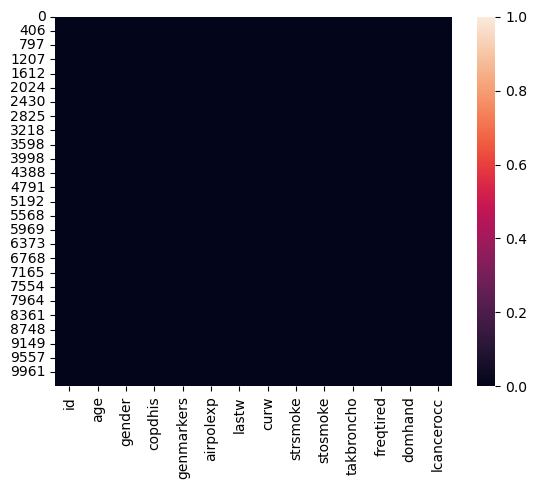

In [17]:
import seaborn as sns
sns.heatmap(df.isnull())

<Axes: xlabel='stosmoke', ylabel='count'>

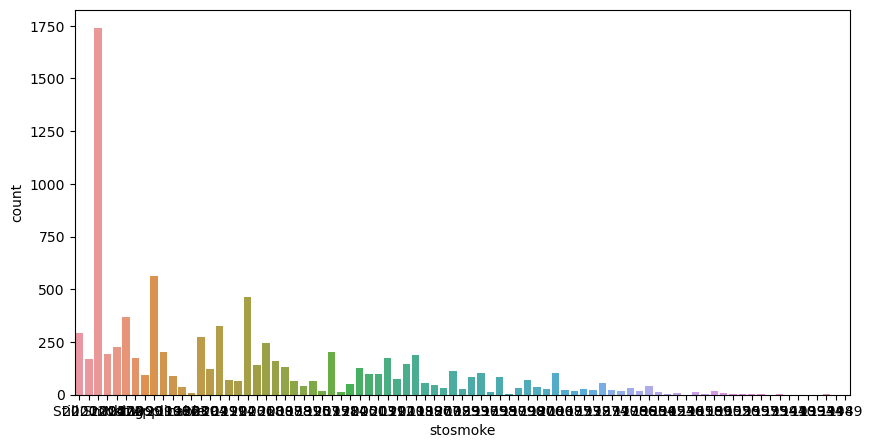

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='stosmoke',data=df)

<Axes: xlabel='strsmoke', ylabel='count'>

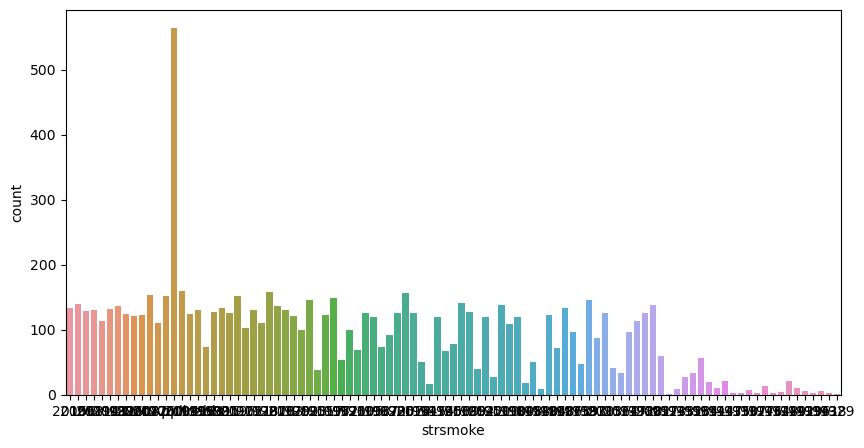

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='strsmoke',data=df)

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Taken Bronchodilators',data = df)

ValueError: Could not interpret input 'Taken Bronchodilators'

<Figure size 1000x500 with 0 Axes>

In [21]:
df = df[df['age'] >= 0]
sorted_smokers = df.groupby('age')['strsmoke'].count().to_frame()
sorted_smokers.style.background_gradient(cmap = 'Reds')

,strsmoke
age,
18,4
20,3
21,2
22,2
23,3
24,6
25,6
26,12
27,15


In [22]:
df.isnull().sum()
df = df.dropna(how='any',axis=0)
df.isnull().sum()
df.info

<bound method DataFrame.info of                  id  age  gender copdhis   genmarkers airpolexp  lastw  curw  \
0      1.468154e+16   42    Male      No  Not Present    Medium     73    69   
1      1.271684e+18   72    Male     Yes  Not Present      High     50    42   
2      1.708068e+18   65    Male     Yes  Not Present       Low     65    75   
3      3.555829e+17   67    Male      No  Not Present      High     69    58   
4      1.684598e+18   54    Male     Yes  Not Present    Medium     46    40   
...             ...  ...     ...     ...          ...       ...    ...   ...   
10342  7.785505e+17   71    Male     Yes  Not Present      High    100    93   
10343  6.202150e+17   47    Male     Yes      Present       Low     55    50   
10344  1.157407e+18   59  Female     Yes  Not Present       Low     80    81   
10345  1.488014e+18   34    Male      No  Not Present      High     65    57   
10346  3.987035e+17   69    Male      No  Not Present      High     81    75   

      s

In [23]:
label = df.age.sort_values().unique()
target = sorted_smokers.strsmoke

In [24]:
print(label)
print(target)

[ 18  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 110 115 116 120]
age
18     4
20     3
21     2
22     2
23     3
      ..
108    2
110    1
115    2
116    2
120    1
Name: strsmoke, Length: 94, dtype: int64


In [25]:
X = df.drop("takbroncho", axis = 1)
y = df["takbroncho"]

In [26]:
X

,id,age,gender,copdhis,genmarkers,airpolexp,lastw,curw,strsmoke,stosmoke,freqtired,domhand,lcancerocc
0,1.468154e+16,42,Male,No,Not Present,Medium,73,69,2015,2020,None / Low,Right,1
1,1.271684e+18,72,Male,Yes,Not Present,High,50,42,2006,2012,Medium,Right,1
2,1.708068e+18,65,Male,Yes,Not Present,Low,65,75,1998,Still Smoking,None / Low,Right,0
3,3.555829e+17,67,Male,No,Not Present,High,69,58,2011,2014,None / Low,Right,1
4,1.684598e+18,54,Male,Yes,Not Present,Medium,46,40,1994,2017,None / Low,Right,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10342,7.785505e+17,71,Male,Yes,Not Present,High,100,93,1958,2015,High,Right,0
10343,6.202150e+17,47,Male,Yes,Present,Low,55,50,2009,Still Smoking,Medium,Right,0
10344,1.157407e+18,59,Female,Yes,Not Present,Low,80,81,2008,2011,Medium,RightBoth,0
10345,1.488014e+18,34,Male,No,Not Present,High,65,57,2020,Still Smoking,Medium,RightBoth,1


In [27]:
y

0         No
1        Yes
2        Yes
3         No
4        Yes
        ... 
10342    Yes
10343    Yes
10344    Yes
10345     No
10346     No
Name: takbroncho, Length: 8518, dtype: object

In [30]:
x_train, x_test, y_train, y_test = train_test_split(label, target,random_state=130)

In [31]:
classifier_model = RandomForestClassifier(random_state=42)

# Fit the model on training data
classifier_model.fit(X_train)

# Make predictions on test data
y_pred_class = classifier_model.predict(X_train)

# Evaluate the classifier model
accuracy = accuracy_score(X_train)
# classification_rep = classification_report(y_test, y_pred_class)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

NameError: name 'X_train' is not defined

In [367]:
import plotly.graph_objects as go

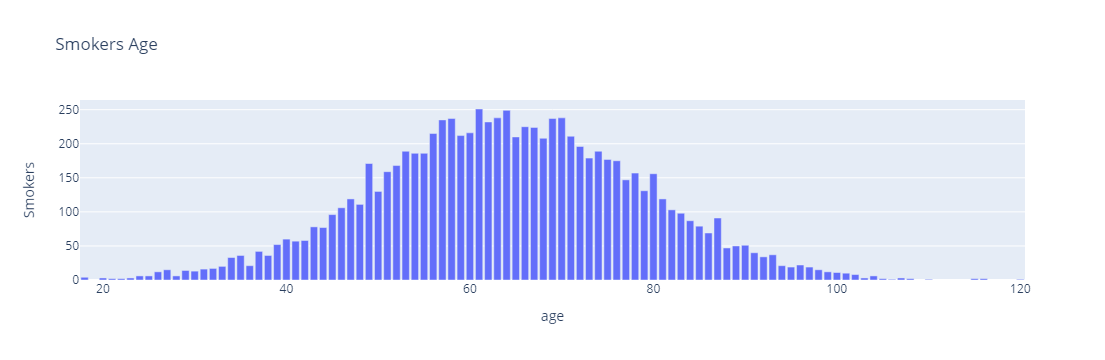

In [369]:
fig = go.Figure()
fig.add_trace(go.Bar(x=label,y=target))
fig.update_layout(title = 'Smokers Age',xaxis=dict(title='age'),yaxis=dict(title='Smokers'))
fig.show()

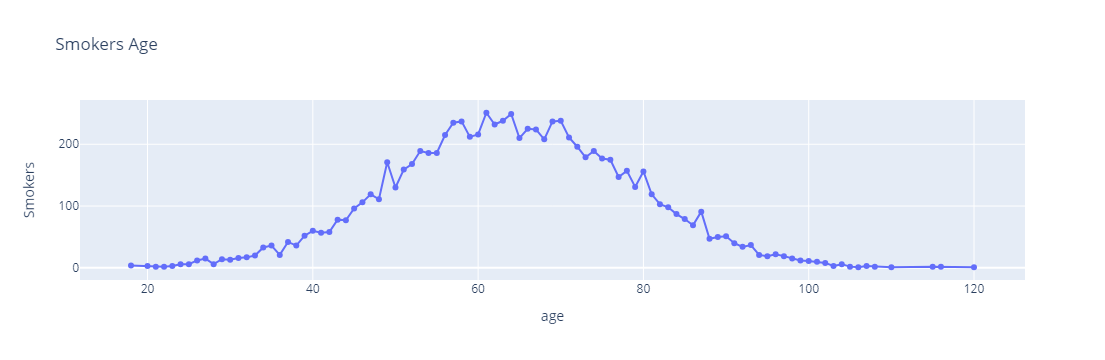

In [370]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=label,y=target,mode='markers+lines'))
fig.update_layout(title = 'Smokers Age',xaxis=dict(title='age'),yaxis=dict(title='Smokers'))
fig.show()

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np 
acc_dict = {}
# create the data
X = df.droplevel(axis = 1)
y = df
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.ensemble import  RandomForestClassifier
# create model
model = RandomForestClassifier()

# fit the data in the model
model.fit(X_train,y_train)

y_pred_randomF = model.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred_randomF)*100)

acc_dict['RFC_log_loss'] = log_loss(y_test, y_pred_randomF)
acc_dict['RFC_F!1_Score'] = f1_score(y_test, y_pred_randomF,average='weighted')
# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_pred_randomF)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

TypeError: NDFrame.droplevel() missing 1 required positional argument: 'level'

In [374]:
from sklearn.ensemble import  RandomForestClassifier
# create model
model = RandomForestClassifier()

# fit the data in the model
model.fit(X_train,y_train)

y_pred_randomF = model.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred_randomF)*100)

acc_dict['RFC_log_loss'] = log_loss(y_test, y_pred_randomF)
acc_dict['RFC_F!1_Score'] = f1_score(y_test, y_pred_randomF,average='weighted')
# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_pred_randomF)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

NameError: name 'X_train' is not defined